# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

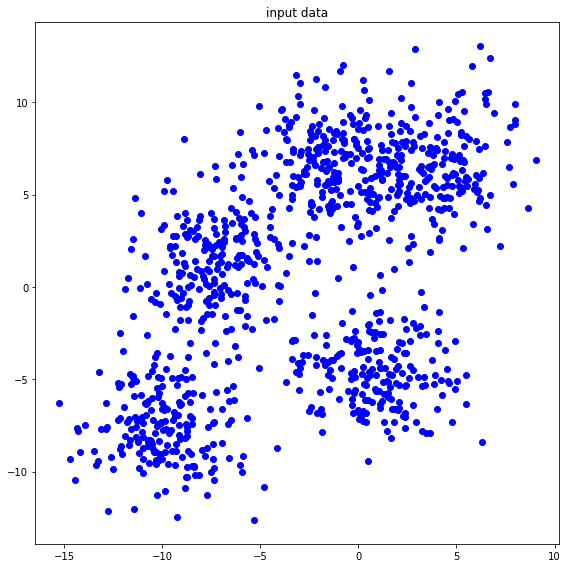

In [4]:
plt.figure(figsize=(8,8))   
plt.title('input data')
# ===================================================
# fill up the blank for plotting the data

plt.title('input data')
plt.plot(x, y, 'o', color = 'blue')
plt.tight_layout()
plt.show()

# ===================================================

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [136]:
def compute_distance(feature, center):
    # ===================================================
    # fill up the function body
    cheon = feature.shape[0]
    temp = (feature - np.tile(center, (cheon, 1)))**2
    distance = np.sqrt(np.sum(temp, axis=1))
    # ===================================================
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [152]:
def compute_centroid(feature, label_feature, value_label):
    # ===================================================
    # fill up the function body
    n = label_feature.shape[0]
    cnt = 1
    zsum = np.array([0, 0])
    for i in range(n):
        if label_feature[i] == value_label:
            cnt += 1
            zsum = np.add(zsum, feature[i])
    centroid = zsum / cnt
    
    # ===================================================
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [153]:
def compute_label(distance):
    # ===================================================
    # fill up the function body
    
    index_label_feature = np.argmin(distance, axis=1)
    
    # ===================================================
    return index_label_feature


In [154]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 100
# ===================================================

## plot the results

In [204]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

label_feature = np.random.randint(0, number_cluster, size=(number_data, 1))
dT = distance.T
for i in range(number_iteration):
    for k in range(number_cluster):
        # ===================================================
        # fill up the blank
        dT[k] = compute_distance(feature, centroid[k])
        centroid[k] = compute_centroid(feature, label_feature, k)
        centroid_iteration[i][k] = centroid[k]
        # ===================================================
    # ===================================================
    # fill up the blank
    distance = dT.T
    loss_iteration[i] = np.sum(distance)*(1/number_data)
    label_feature = compute_label(distance)
    # ===================================================

In [156]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    # ===================================================
    # fill up the blank
    x = feature[:,0]
    y = feature[:,1]
    plt.title('input data')
    plt.plot(x, y, 'o', color = 'blue')
   
    # ===================================================
    plt.tight_layout()
    plt.show()

In [186]:
num = np.arange(number_iteration)
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
    plt.plot(num, loss_iteration, '-', color = 'red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    # ===================================================
    plt.tight_layout()
    plt.show()

In [198]:
def plot_centroid(centroid_iteration):
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    # ===================================================
    # fill up the blank
    plt.plot(centroid_iteration[0][0][0], centroid_iteration[0][0][1], 'o', color = 'blue', label = 'initial')
    n = centroid_iteration.shape[1]
    for i in range(1, n):
        plt.plot(centroid_iteration[0][i][0], centroid_iteration[0][i][1], 'o', color = 'blue')
    #centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))   
    # line
    for i in range(n):
        for j in range(centroid_iteration.shape[0]):
            plt.plot(centroid_iteration[j][i][0], centroid_iteration[j][i][1], '-',  color = 'black')
    #plt.plot(centroid_iteration[0][0], '-', label = 'cluster='+str(i))
        
    # final
    plt.plot(centroid_iteration[0][0][0], centroid_iteration[0][0][1], 'o', color = 'red', label = 'final')
    for i in range(1, n):
        plt.plot(centroid_iteration[-1][i][0], centroid_iteration[-1][i][1], 'o', color = 'red')
    
    plt.legend()
    # ===================================================
    plt.tight_layout()
    plt.show()

In [ ]:
theta_iteration = np.zeros((num_iteration, theta.size))
n = theta_iteration.shape[1]
    for i in range(n):
        plt.plot(num, theta_iteration[:,i], '-', color = color[i], label  = 'theta'+str(i))

In [164]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    # ===================================================
    # fill up the blank
    #
    
    
    plt.colorbar()
    # ===================================================
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

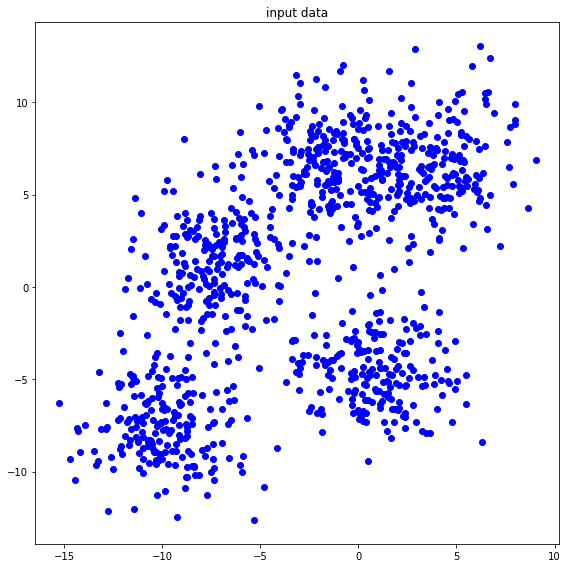

In [165]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

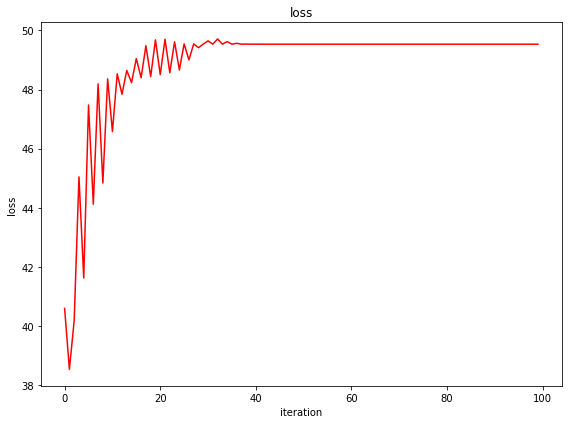

In [187]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

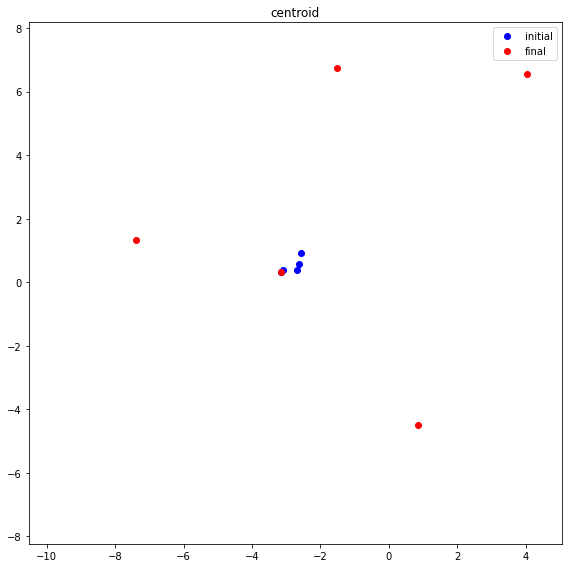

In [199]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

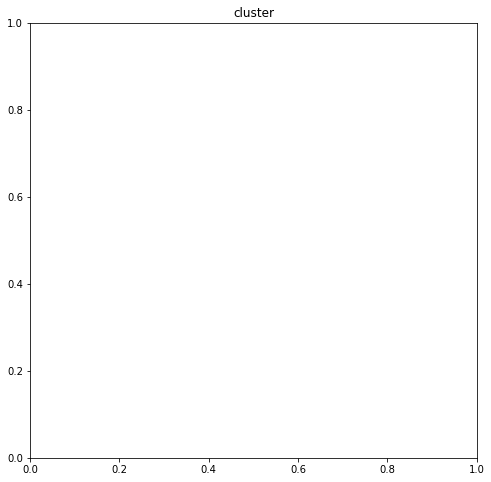

In [200]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

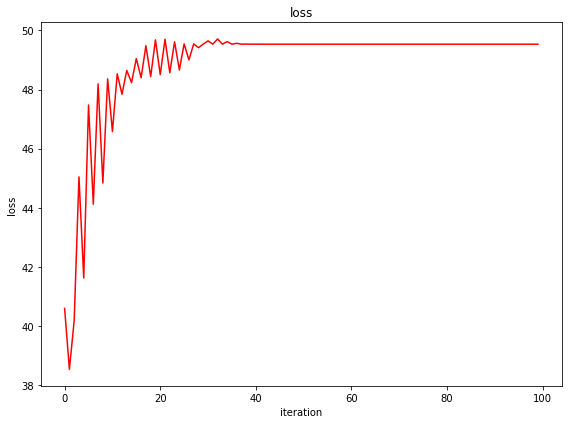

In [201]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

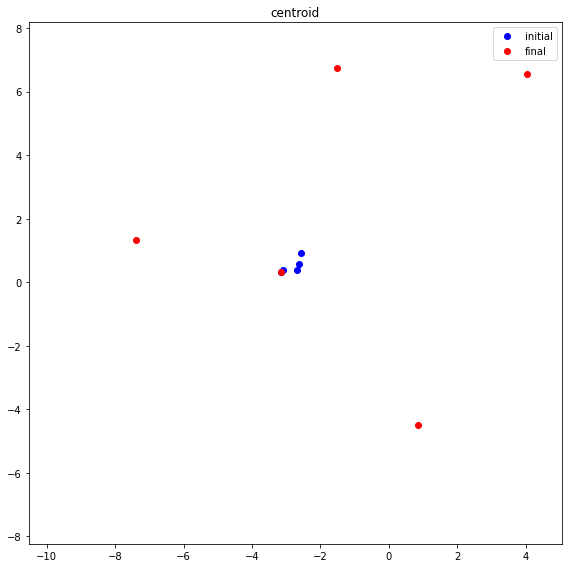

In [202]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

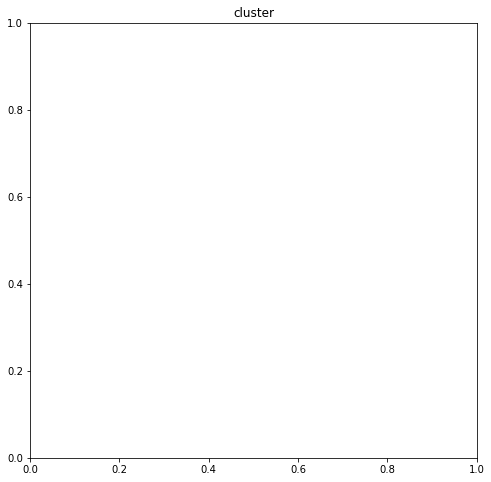

In [203]:
plot_cluster(feature, label_feature, label_cluster)